In [1]:
%%latex

echo "# CellLines" >> README.md
git init
git add README.md
git commit -m "first commit"
git remote add origin https://github.com/jesnyder/CellLines.git
git push -u origin master


<IPython.core.display.Latex object>

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv


def csvread(n):
    a = pd.read_csv(n) # Pandas read csv into DataFrame
    a = np.array(a) #convert to NumPy array
    return(a)

# Github URL for csv data files
CDC = 'https://raw.githubusercontent.com/jesnyder/CellLines/master/CDC.csv';
CL  = 'https://raw.githubusercontent.com/jesnyder/CellLines/master/CellLineSum.csv';
Pat = 'https://raw.githubusercontent.com/jesnyder/CellLines/master/PatCount.csv';
Pub = 'https://raw.githubusercontent.com/jesnyder/CellLines/master/PubCount.csv';

CDC = csvread(CDC); 
CL  = csvread(CL); 
Pat = csvread(Pat); 
Pub = csvread(Pub);       


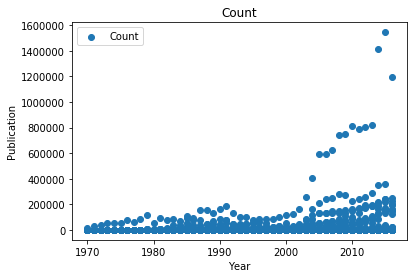

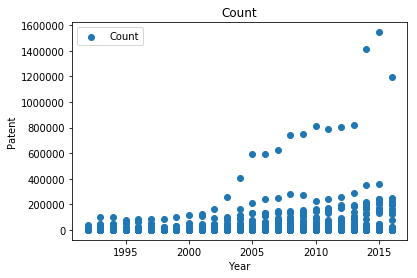

In [67]:
def countfig(x,y,a):
    plt.scatter(x,y, label='Count')
    plt.xlabel('Year')
    plt.ylabel(a)
    plt.title('Count')
    plt.legend()
    plt.show()

countfig(Pub[:,3],Pub[:,4],'Publication')
countfig(Pat[:,3],Pat[:,4],'Patent')


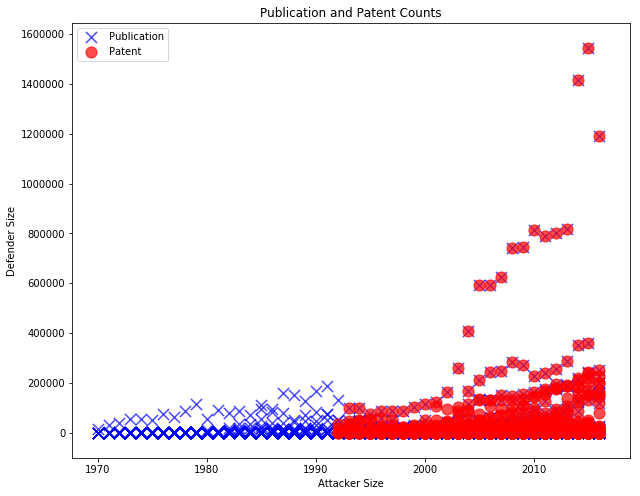

In [71]:
plt.figure(figsize=(10,8)) # Create a figure
           
plt.scatter(Pub[:,3],Pub[:,4], marker='x', color='b', alpha=0.7, s = 124, label='Publication')
plt.scatter(Pat[:,3],Pat[:,4], marker='o', color='r', alpha=0.7, s = 124, label='Patent')
plt.title('Publication and Patent Counts')
plt.ylabel('Defender Size')
plt.xlabel('Attacker Size')
plt.legend(loc='upper left')





\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

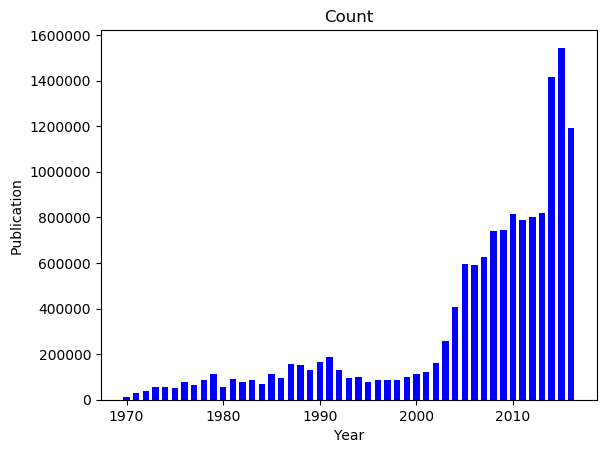

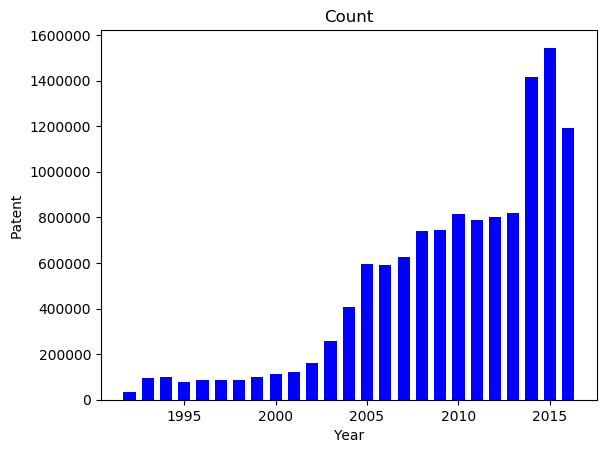

In [84]:
import matplotlib.pyplot as plt
import plotly.plotly as py

def countbarchart(x,y,a):
    width = 1/1.5
    plt.bar(x, y, width, color="blue")
    fig = plt.gcf()
    plt.xlabel('Year')
    plt.ylabel(a)
    plt.title('Count')
    plt.legend()
    plt.show()

countbarchart(Pub[:,3],Pub[:,4],'Publication')
countbarchart(Pat[:,3],Pat[:,4],'Patent')

